In [ ]:
pip install ultralytics opencv-python torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 28.0 MB/s eta 0:00:00



0: 640x544 1 cake, 1 dining table, 63.1ms
Speed: 2.0ms preprocess, 63.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)
Detected class: 55, Confidence: 0.9204280376434326, Box: (47, 75), (89, 125)
Detected class: 60, Confidence: 0.6358382701873779, Box: (0, 0), (143, 175)
Detected class: 55, Confidence: 0.9204280376434326


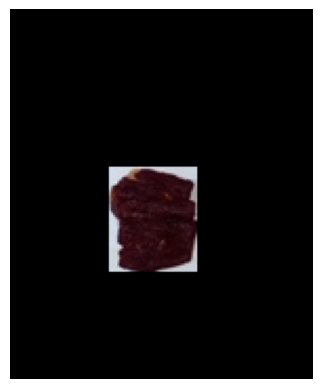

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8l.pt')

# Load your image
img_path = "Rotten (1702).jpg"  # Path to your uploaded image
img = cv2.imread(img_path)

# Run the detection
results = model(img)

# Access the first result in the list
result = results[0]  # YOLOv8 returns a list of results

# Visualize and print results using OpenCV
annotated_img = result.plot()  # This will return the image with bounding boxes

# Save the annotated image with detections
# cv2.imwrite('output_image_with_boxes.jpg', annotated_img)

# Print detected object classes and bounding boxes
for box in result.boxes:
    cls = int(box.cls)  # Get the class index of the object
    conf = box.conf.item()  # Get the confidence score of the detection
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())  # Convert coordinates to integers
    print(f"Detected class: {cls}, Confidence: {conf}, Box: ({x1}, {y1}), ({x2}, {y2})")

# ---- Extract object and place it on black background ----

# Loop over detected objects and find the one labeled as "cake"
for box in result.boxes:
    cls = int(box.cls)  # Get the class index of the object
    conf = box.conf.item()  # Get the confidence score of the detection

    # Print class and confidence to debug
    print(f"Detected class: {cls}, Confidence: {conf}")

    # For now, let's extract the first object detected
    # If you know the class index of 'cake', use it here (e.g., cls == 56)
    if conf > 0.5:  # Filter by confidence if needed
        # Get bounding box coordinates (xyxy format)
        x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())  # Convert coordinates to integers

        # Extract the region of interest (the detected object)
        extracted_object = img[y1:y2, x1:x2]

        # Create a black background of the same size as the original image
        black_background = np.zeros_like(img)

        # Place the extracted object on the black background
        black_background[y1:y2, x1:x2] = extracted_object

        # Save the result to a file
        cv2.imwrite('object_on_black.jpg', black_background)

        # Display the image with the object on a black background
        plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        break  # If you only want to extract the first object

Image shape: (176, 144, 3)


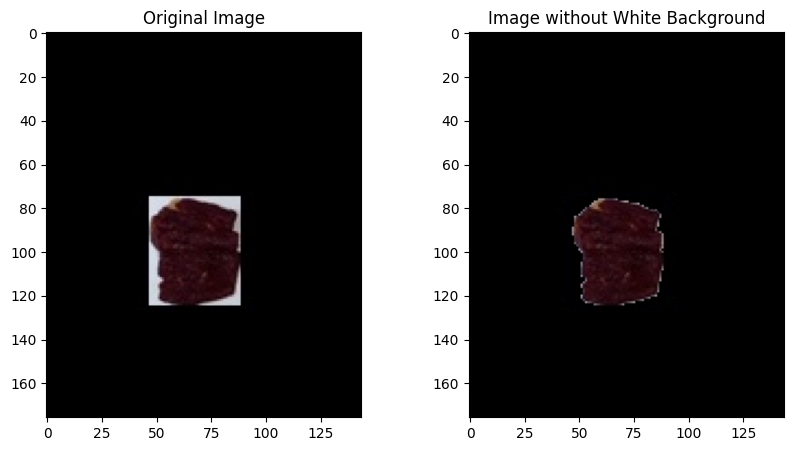

In [ ]:
image_path = 'object_on_black.jpg'
image = cv2.imread(image_path)
# Check if the image is loaded properly and check its shape
if image is None:
    raise ValueError("Image could not be loaded.")

print(f"Image shape: {image.shape}")  # This should show (height, width, 3) if RGB

# Ensure the image has 3 channels (RGB)
if len(image.shape) < 3 or image.shape[2] != 3:
    print("Image is grayscale, converting to RGB...")
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to RGB

# Step 1: Define the color range for detecting white background in RGB
# White in RGB has high values in all channels (R, G, B)
lower_white = np.array([150, 150, 150], dtype=np.uint8)  # Lower bound for white detection
upper_white = np.array([255, 255, 255], dtype=np.uint8)  # Upper bound for white detection

# Step 2: Create a mask for the white areas based on RGB color range
mask = cv2.inRange(image, lower_white, upper_white)

# Step 3: Invert the mask (now the white areas will be black, and the rest of the image will be white)
inverted_mask = cv2.bitwise_not(mask)

# Step 4: Apply the inverted mask to the input image to remove the white background
image_without_white_background = cv2.bitwise_and(image, image, mask=inverted_mask)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_without_white_background, cv2.COLOR_BGR2RGB))
plt.title("Image without White Background")

plt.show()